<a href="https://colab.research.google.com/github/leoncerqueira/CodesMackenzie/blob/main/T4_%E2%80%93_Atividade_de_Aprofundamento_Leonardo_Nunes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

base = pd.read_csv("/content/sample_data/male_industry_workers_percent_of_male_employment.csv", sep=';').rename(columns = {'country':'PAIS'})


base_depara = pd.read_csv("/content/sample_data/male_industry_workers_percent_of_male_employment_APOIO.csv",
                          sep=';',
                          encoding = 'latin1').rename(columns = {'PAIS_INGLES':'PAIS',
                                                                 'TRADUCAO':'PAIS_BR'})


base = base.merge(base_depara,
                  how = 'left',
                  left_on = ['PAIS'] ,
                  right_on = ['PAIS'])

base = base.drop(columns=['Unnamed: 30','PAIS'])

base = base.rename(columns = {'PAIS_BR':'PAIS'})

# **Analise da base full**

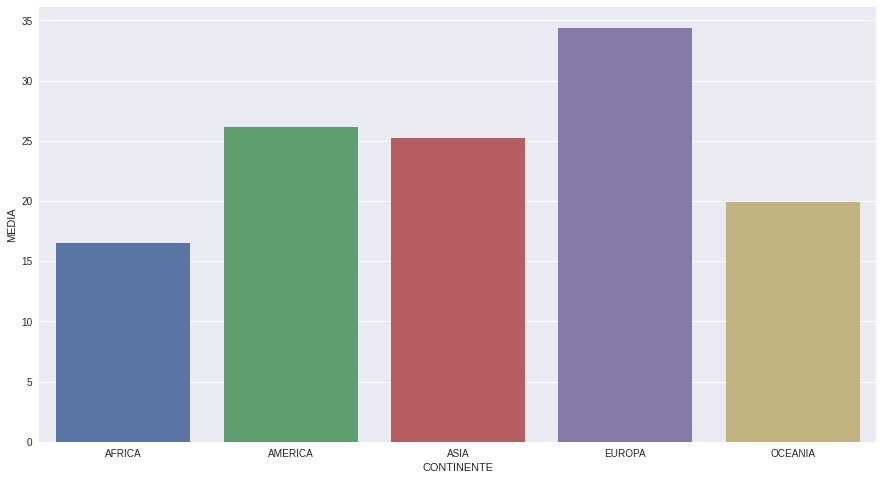

In [69]:
base_full = base

base_full['MEDIA'] = base_full.mean(axis=1)

base_full = base_full [['CONTINENTE','MEDIA']]

base_full = base_full.groupby(["CONTINENTE"]).agg('mean').reset_index(drop = False)


plt.figure(figsize=(15,8))
mpl.style.use(['seaborn'])
sns.barplot(x=base_full.CONTINENTE,y=base_full['MEDIA'])
plt.xticks(rotation=0) 

plt.show()

# **Analise dos ultimo 10 anos disponiveis na base**

<ipython-input-70-8248c512a77b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_10_anos['MEDIA'] = base_10_anos.mean(axis=1)


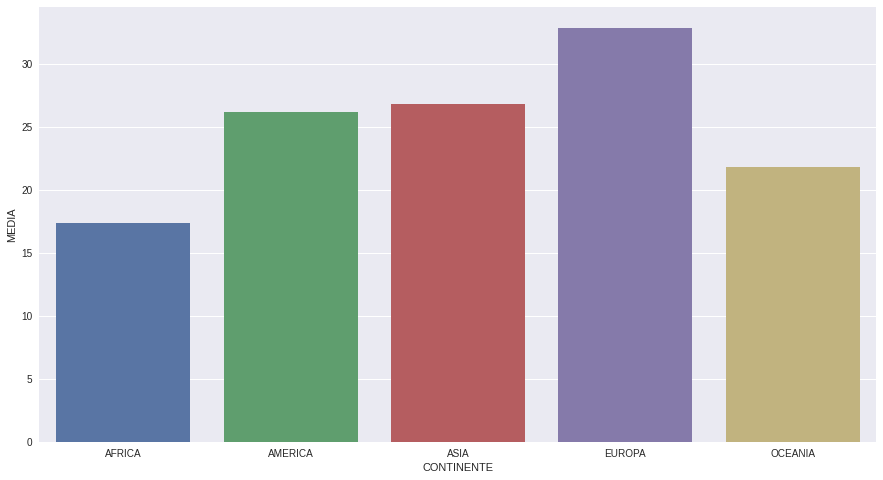

In [70]:
base_10_anos = base [['CONTINENTE','PAIS','2008','2009','2010','2011','2012',
              '2013','2014','2015','2016','2017','2018']]

base_10_anos['MEDIA'] = base_10_anos.mean(axis=1)

base_10_anos = base_10_anos [['CONTINENTE','MEDIA']]

base_10_anos = base_10_anos.groupby(["CONTINENTE"]).agg('mean').reset_index(drop = False)


plt.figure(figsize=(15,8))
mpl.style.use(['seaborn'])
sns.barplot(x=base_10_anos.CONTINENTE,y=base_10_anos['MEDIA'])
plt.xticks(rotation=0) 

plt.show()

# **Analise dos Paises Africanos**

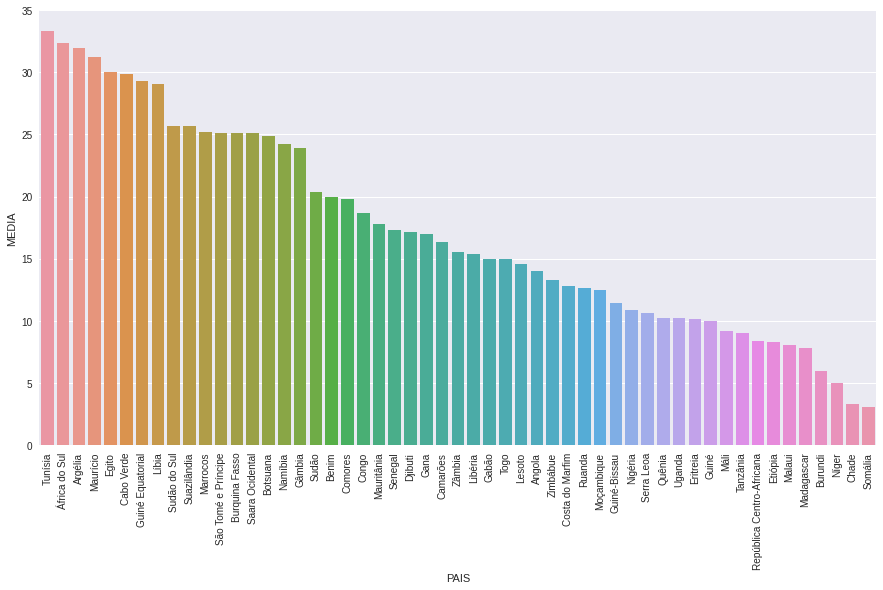

In [80]:
base_africa = base [['CONTINENTE','PAIS','2008','2009','2010','2011','2012',
              '2013','2014','2015','2016','2017','2018']]

base_africa = base_africa[base_africa['CONTINENTE'] == 'AFRICA'] 

base_africa['MEDIA'] = base_africa.mean(axis=1)

base_africa = base_africa [['PAIS','MEDIA']]

base_africa = base_africa.groupby(["PAIS"]).agg('mean').reset_index(drop = False)

base_africa = base_africa.sort_values('MEDIA',ascending=False)


plt.figure(figsize=(15,8))
mpl.style.use(['seaborn'])
sns.barplot(x=base_africa.PAIS,y=base_africa['MEDIA'])
plt.xticks(rotation=90) 

plt.show()

# **Analise dos Paises Europeus**

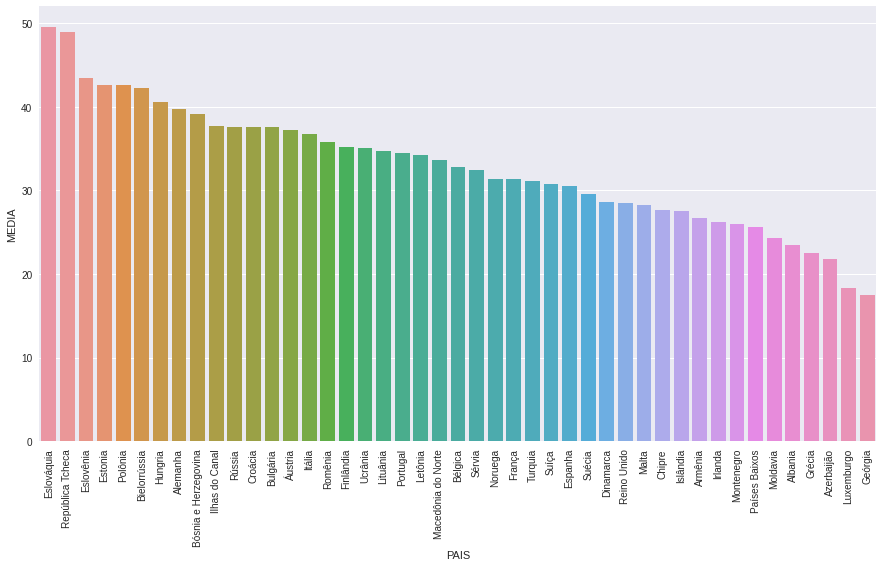

In [81]:
base_europa = base [['CONTINENTE','PAIS','2008','2009','2010','2011','2012',
              '2013','2014','2015','2016','2017','2018']]

base_europa = base_europa[base_europa['CONTINENTE'] == 'EUROPA'] 

base_europa['MEDIA'] = base_europa.mean(axis=1)

base_europa = base_europa [['PAIS','MEDIA']]

base_europa = base_europa.groupby(["PAIS"]).agg('mean').reset_index(drop = False)

base_europa = base_europa.sort_values('MEDIA',ascending=False)


plt.figure(figsize=(15,8))
mpl.style.use(['seaborn'])
sns.barplot(x=base_europa.PAIS,y=base_europa['MEDIA'])
plt.xticks(rotation=90) 

plt.show()

#Questões a serem respondidas:

####**Qual é a taxa de empregabilidade no setor industrial desde 1990?**
Resposta: O continente com maior média de empregabilidade no setor industrial, demonstrou ser a Europa, com 34.4%, seguido respectivamente pela America com 
26,12 %, Asia com 25,26%, Oceania com 19,89% e o continente Africano com apenas 16,48%

####**Recortando a média dos ultimos 10 anos, o parametro se manteve o mesmo?**
Resposta: Recortando o mesmo cenario pelo ultimos 10 anos, a Asia assume a 2 colocação no lugar da America, com 26,82%. A Europa permanece no topo, contudo teve uma queda, ficando com média de 32,87%


####**Analisando apenas os ultimos 10 anos do continente afriano, quais paises possuem a pior taxa de empregabilidade no setor industrial?**
Resposta: Apesar da Tunisia e a Africa do Sul tem percentuais altos, varios paises se encontram com menos de 10%, como: Somalia, Chade, Nigeria, Madagascar entre outros...

####**Analisando apenas os ultimos 10 anos do continente Europei, quais paises possuem a maior taxa de empregabilidade no setor industrial?**
Resposta: Na Europa conseguimos verificar que existem paises com taxa maiores que 40%: Eslováquia, Republica Tcheca, Eslovenia, Estonia, Polonia, Bielorussia e Hungria

